In [233]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# GAMMA OTOMATIS #

In [234]:
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

def calculate_brightness(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return np.mean(gray_image)

def auto_gamma(brightness):
    if brightness < 100:
        return 2.0
    elif brightness > 150:
        return 0.5 
    else:
        return 1.0  

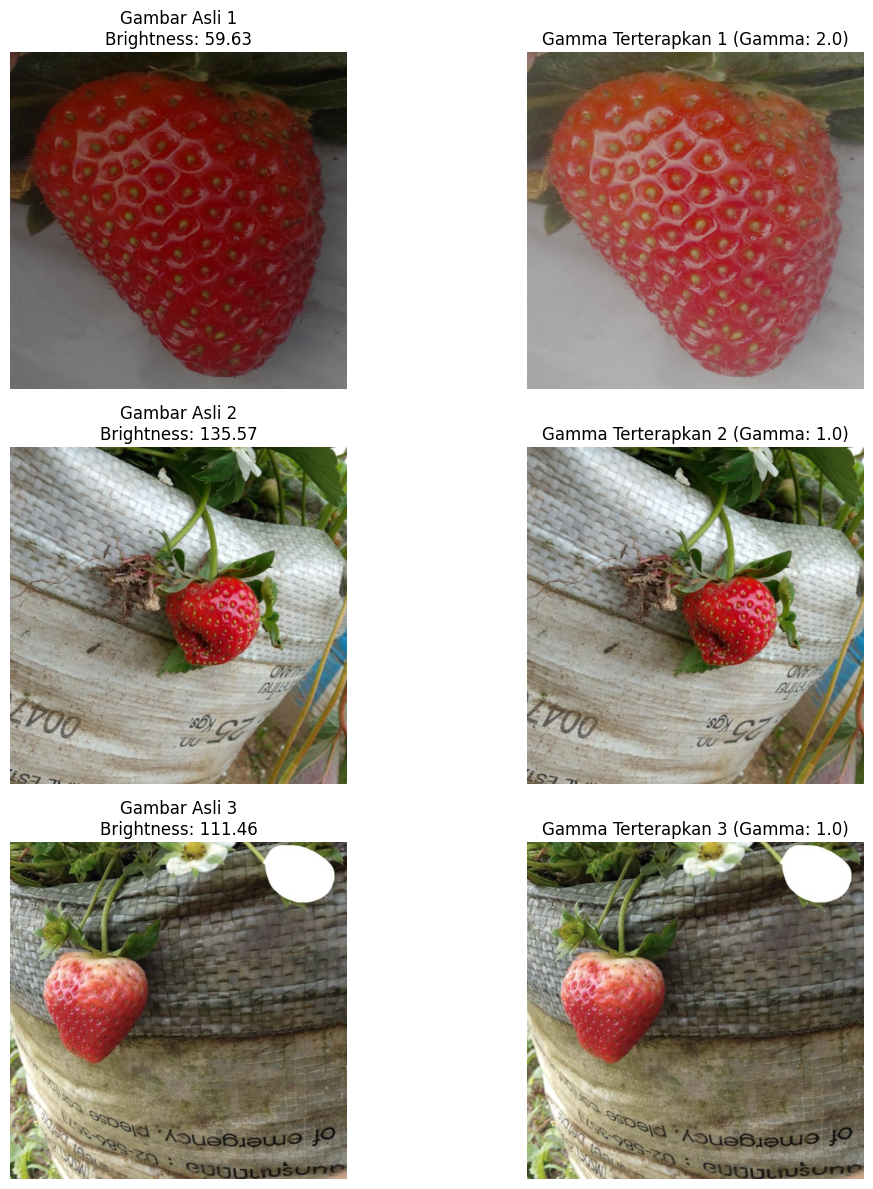

In [235]:
img1 = cv2.imread('strawberry1.png')
img2 = cv2.imread('strawberry2.jpg')
img3 = cv2.imread('strawberry3.jpg')

img1 = cv2.resize(img1, (640, 640))
img2 = cv2.resize(img2, (640, 640))
img3 = cv2.resize(img3, (640, 640))

brightness1 = calculate_brightness(img1)
brightness2 = calculate_brightness(img2)
brightness3 = calculate_brightness(img3)

gamma1 = auto_gamma(brightness1)
gamma2 = auto_gamma(brightness2)
gamma3 = auto_gamma(brightness3)

adjusted_img1 = adjust_gamma(img1, gamma1)
adjusted_img2 = adjust_gamma(img2, gamma2)
adjusted_img3 = adjust_gamma(img3, gamma3)

fig, ax = plt.subplots(3, 2, figsize=(12, 12))

# Gambar 1
ax[0, 0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
ax[0, 0].set_title(f"Gambar Asli 1\nBrightness: {brightness1:.2f}")
ax[0, 0].axis("off")

ax[0, 1].imshow(cv2.cvtColor(adjusted_img1, cv2.COLOR_BGR2RGB))
ax[0, 1].set_title(f"Gamma Terterapkan 1 (Gamma: {gamma1})")
ax[0, 1].axis("off")

# Gambar 2
ax[1, 0].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax[1, 0].set_title(f"Gambar Asli 2\nBrightness: {brightness2:.2f}")
ax[1, 0].axis("off")

ax[1, 1].imshow(cv2.cvtColor(adjusted_img2, cv2.COLOR_BGR2RGB))
ax[1, 1].set_title(f"Gamma Terterapkan 2 (Gamma: {gamma2})")
ax[1, 1].axis("off")

# Gambar 3
ax[2, 0].imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
ax[2, 0].set_title(f"Gambar Asli 3\nBrightness: {brightness3:.2f}")
ax[2, 0].axis("off")

ax[2, 1].imshow(cv2.cvtColor(adjusted_img3, cv2.COLOR_BGR2RGB))
ax[2, 1].set_title(f"Gamma Terterapkan 3 (Gamma: {gamma3})")
ax[2, 1].axis("off")

plt.tight_layout()
plt.show()

# MASKING WARNA MERAH DAN GREEN #

In [236]:
def mask_red_and_green(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    lower_red = np.array([0, 150, 0])     
    upper_red = np.array([255, 255, 255])
    mask_red = cv2.inRange(lab, lower_red, upper_red)

    lower_green = np.array([0, 0, 0])
    upper_green = np.array([255, 255, 100])  
    mask_green = cv2.inRange(lab, lower_green, upper_green)

    mask_combined = cv2.bitwise_or(mask_red, mask_green)
    
    return mask_combined

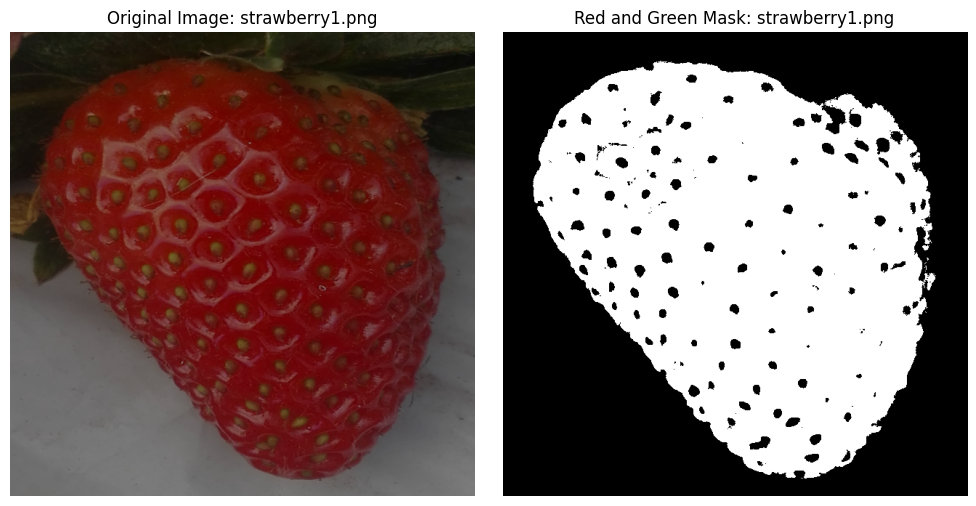

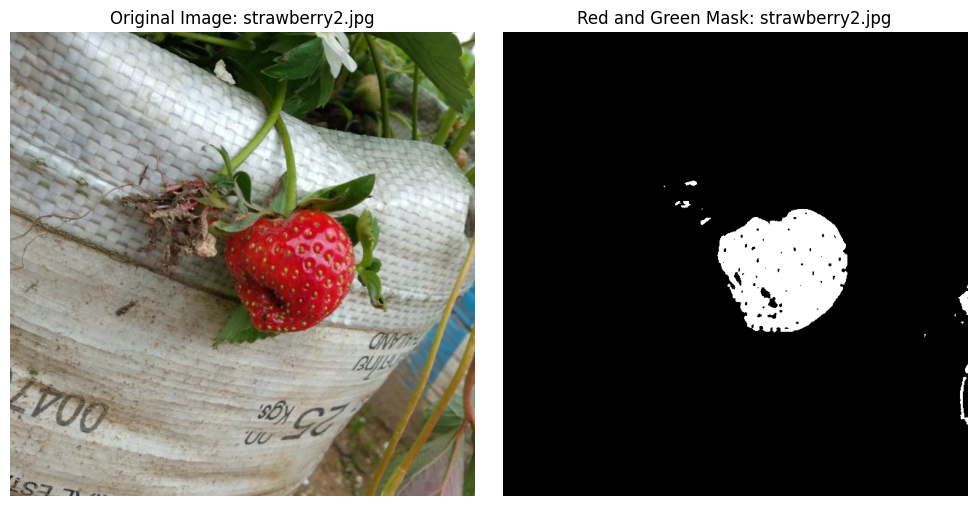

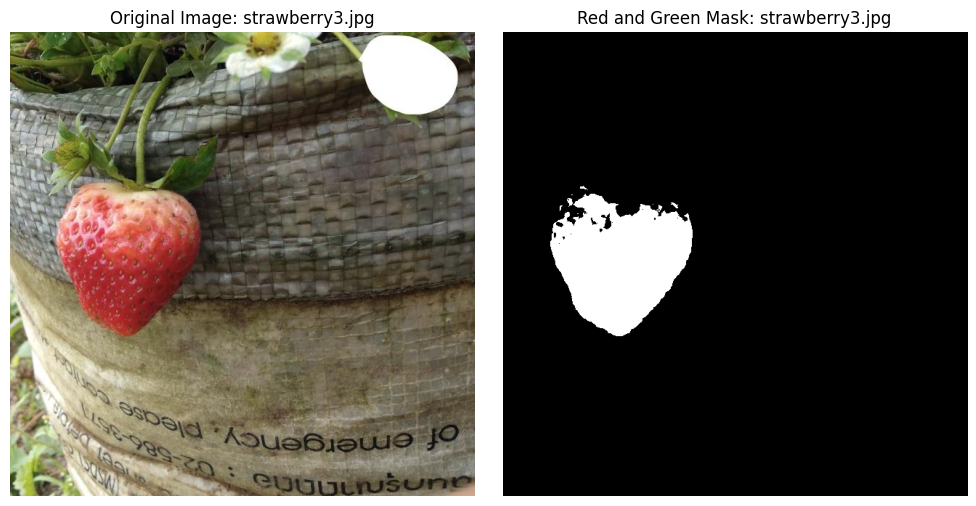

In [237]:
img_paths = ['strawberry1.png', 'strawberry2.jpg', 'strawberry3.jpg']

for img_path in img_paths:
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, (640, 640)) 
    
    mask = mask_red_and_green(img_resized)
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
    ax[0].set_title(f"Original Image: {img_path}")
    ax[0].axis('off')

    ax[1].imshow(mask, cmap='gray')
    ax[1].set_title(f"Red and Green Mask: {img_path}")
    ax[1].axis('off')

    plt.tight_layout()
    plt.show()

# MORFOLOGI OPENING & CLOSING #

In [ ]:
def apply_morphological_operations(mask):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))


    cleaned_mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=8)

    return cleaned_mask


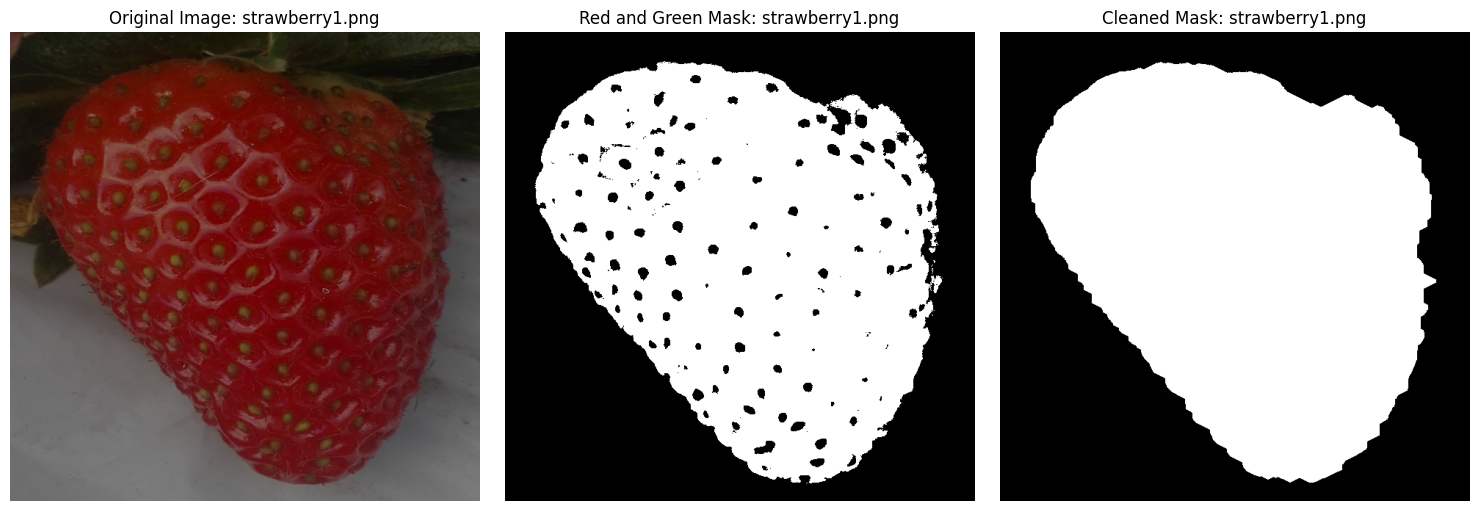

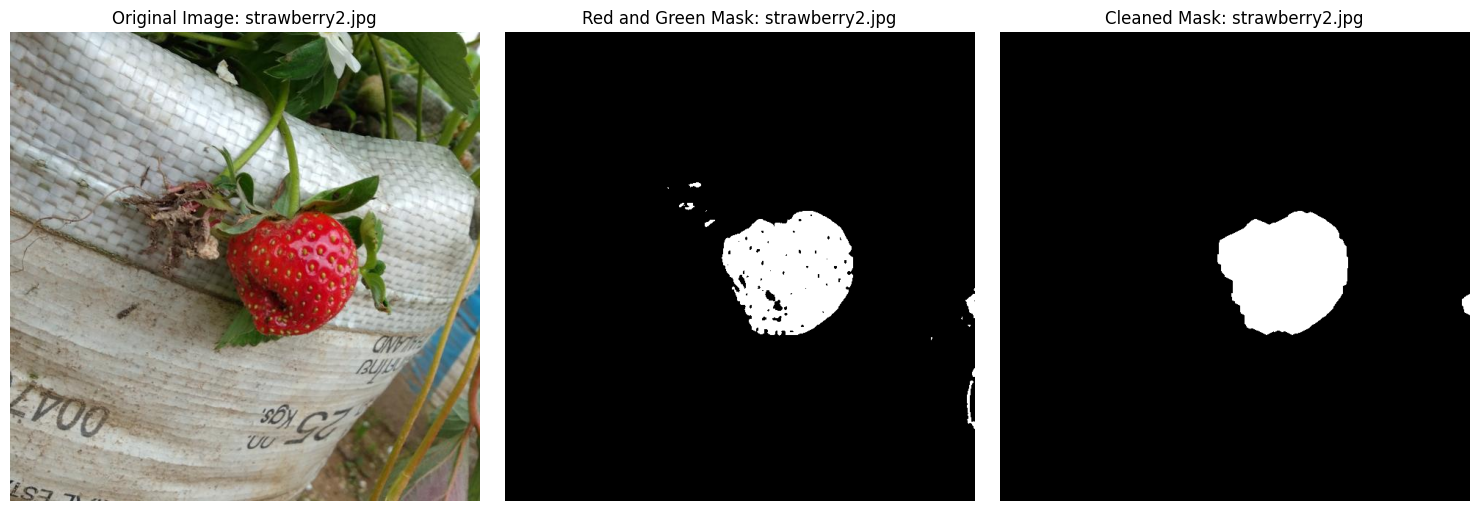

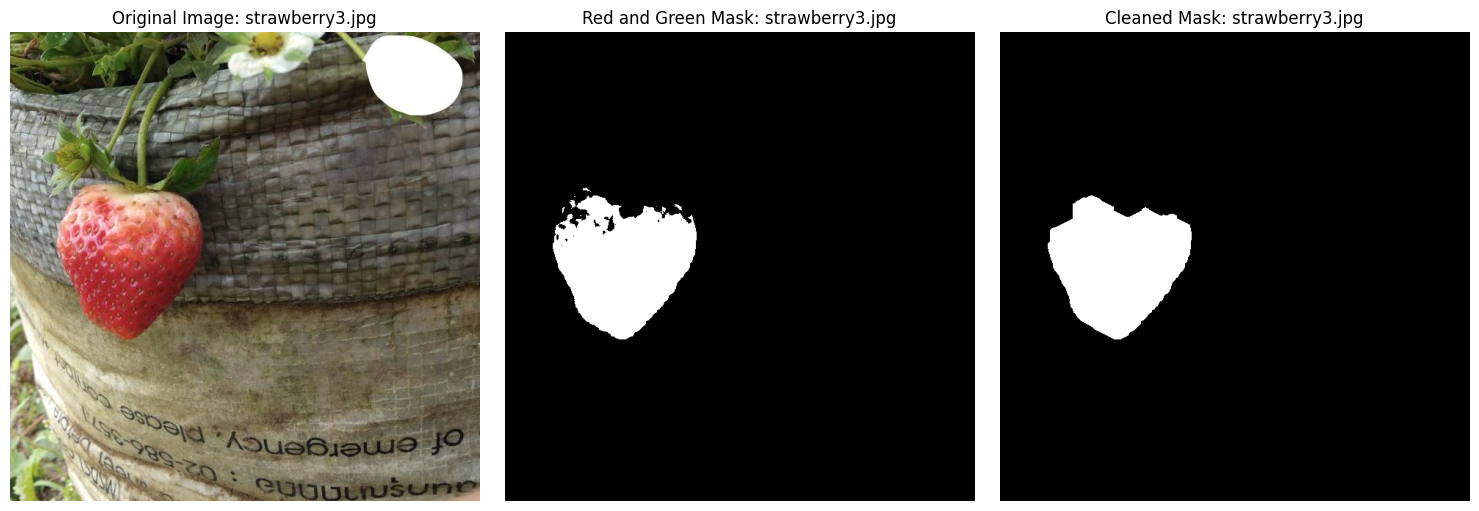

In [239]:
img_paths = ['strawberry1.png', 'strawberry2.jpg', 'strawberry3.jpg']

for img_path in img_paths:
    img = cv2.imread(img_path)
    
    if img is None:
        print(f"Error: Unable to load image {img_path}")
        continue
    
    img_resized = cv2.resize(img, (640, 640))  
    
    mask = mask_red_and_green(img_resized)
    
    cleaned_mask = apply_morphological_operations(mask)
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
    # Gambar asli
    ax[0].imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
    ax[0].set_title(f"Original Image: {img_path}")
    ax[0].axis('off')

    # Masker merah dan hijau
    ax[1].imshow(mask, cmap='gray')
    ax[1].set_title(f"Red and Green Mask: {img_path}")
    ax[1].axis('off')

    # Masker yang sudah dibersihkan dengan morfologi
    ax[2].imshow(cleaned_mask, cmap='gray')
    ax[2].set_title(f"Cleaned Mask: {img_path}")
    ax[2].axis('off')

    plt.tight_layout()
    plt.show()

# DETEKSI GARIS TEPI #

In [240]:
def detect_edges_from_mask(mask):
    edges = cv2.Canny(mask, threshold1=50, threshold2=150)
    return edges

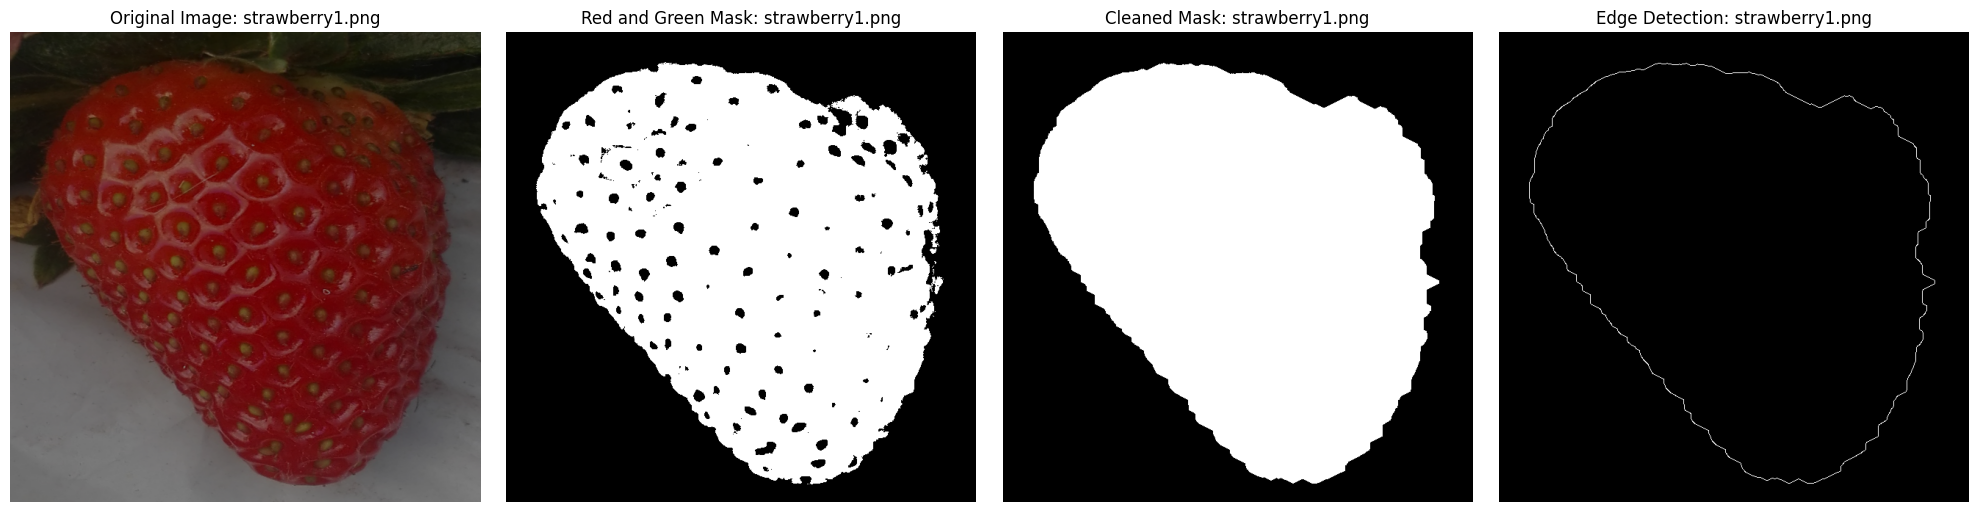

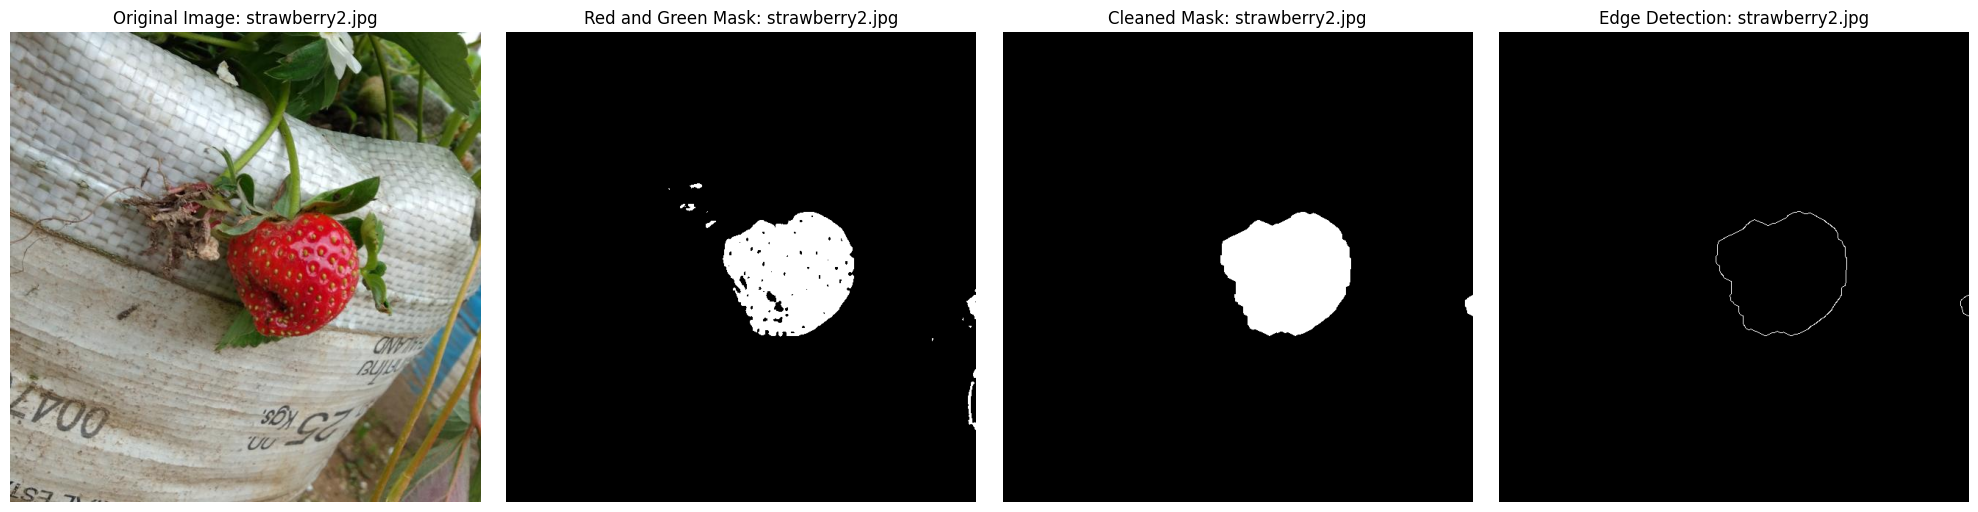

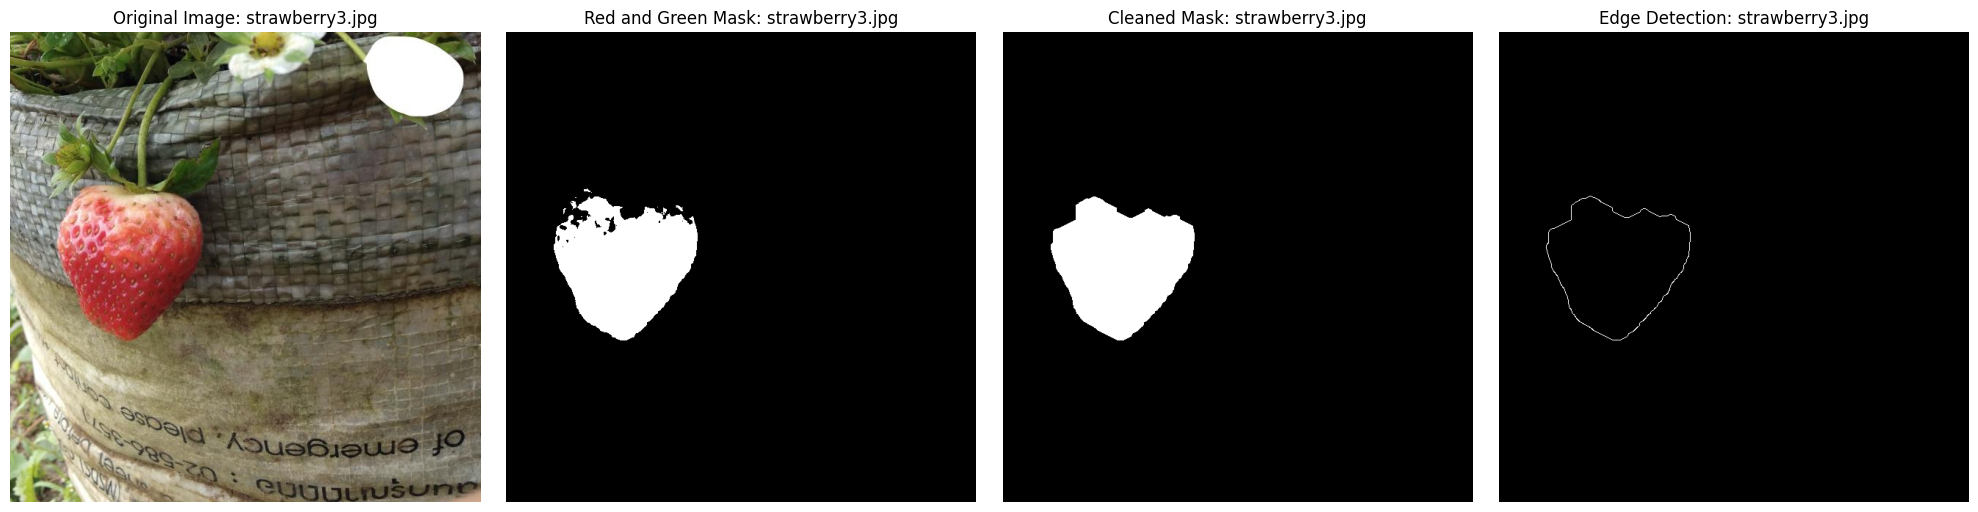

In [241]:
img_paths = ['strawberry1.png', 'strawberry2.jpg', 'strawberry3.jpg']

for img_path in img_paths:
    img = cv2.imread(img_path)
    
    if img is None:
        print(f"Error: Unable to load image {img_path}")
        continue
    
    img_resized = cv2.resize(img, (640, 640))  
    
    mask = mask_red_and_green(img_resized)
    
    cleaned_mask = apply_morphological_operations(mask)
    
    edges_mask = detect_edges_from_mask(cleaned_mask)
    
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    
    # Gambar asli
    ax[0].imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
    ax[0].set_title(f"Original Image: {img_path}")
    ax[0].axis('off')

    # Masker merah dan hijau
    ax[1].imshow(mask, cmap='gray')
    ax[1].set_title(f"Red and Green Mask: {img_path}")
    ax[1].axis('off')

    # Masker yang sudah dibersihkan dengan morfologi
    ax[2].imshow(cleaned_mask, cmap='gray')
    ax[2].set_title(f"Cleaned Mask: {img_path}")
    ax[2].axis('off')

    # Garis tepi dari masker
    ax[3].imshow(edges_mask, cmap='gray')
    ax[3].set_title(f"Edge Detection: {img_path}")
    ax[3].axis('off')

    plt.tight_layout()
    plt.show()

# LABEL GARIS TEPI #

In [ ]:

def calculate_red_percentage(image, mask):
    red_pixels = np.count_nonzero(mask)
    total_pixels = image.shape[0] * image.shape[1]
    red_percentage = (red_pixels / total_pixels) * 100
    return red_percentage

def determine_ripeness(red_percentage):
    if red_percentage >= 80:
        return "Matang"
    elif red_percentage >= 40:
        return "Setengah Matang"
    else:
        return "Belum Matang"

# BOUNDING BOX #

In [243]:
def label_image_with_bounding_box(image, mask):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    img_with_boxes = image.copy()

    max_area = 0
    max_contour = None
    bounding_box = None

    for contour in contours:
        area = cv2.contourArea(contour)
        if area > max_area:
            max_area = area
            max_contour = contour

    if max_contour is not None:
        x, y, w, h = cv2.boundingRect(max_contour)
        bounding_box = (x, y, w, h)

        cv2.rectangle(img_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img_with_boxes, f'Class: 1', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
        cv2.putText(img_with_boxes, f'X: {x}, Y: {y}', (x, y + h + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
        cv2.putText(img_with_boxes, f'W: {w}, H: {h}', (x, y + h + 40), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    return img_with_boxes, bounding_box

In [244]:
def calculate_red_percentage(image):
    mask = mask_red_and_green(image)
    red_pixels = np.count_nonzero(mask)
    total_pixels = image.shape[0] * image.shape[1]
    red_percentage = (red_pixels / total_pixels) * 100
    return red_percentage

def process_image(image_path):
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Error: Unable to load image {image_path}")
        return

    red_percentage = calculate_red_percentage(image)
    
    print(f"Persentase warna merah pada gambar {image_path}: {red_percentage:.2f}%")
    return red_percentage

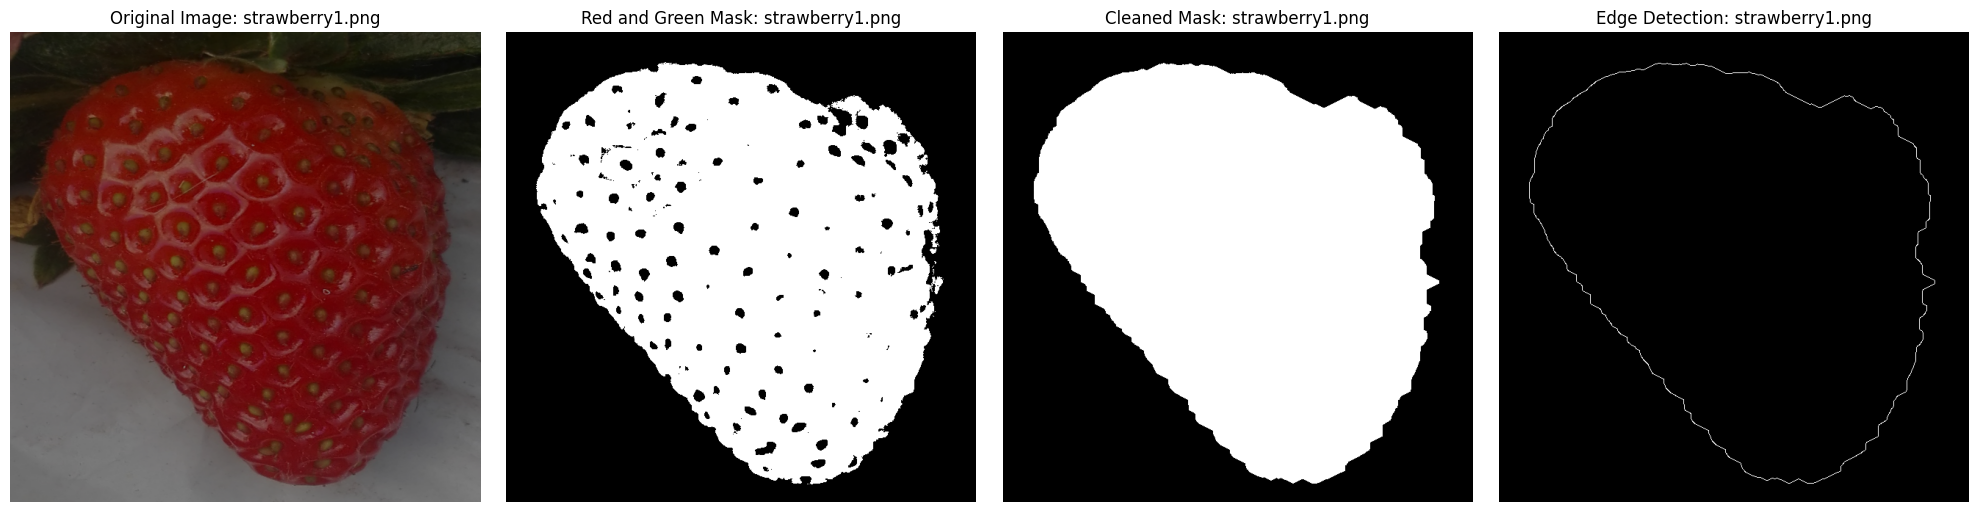

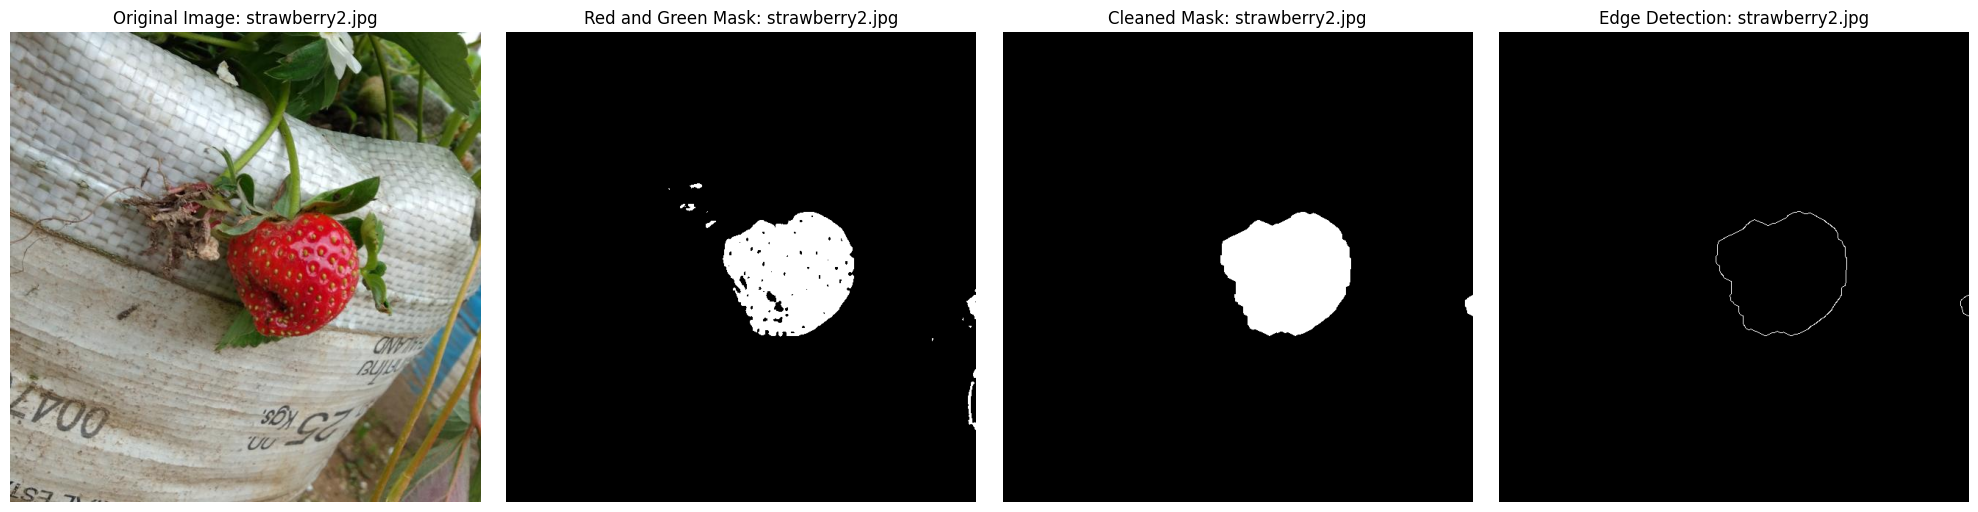

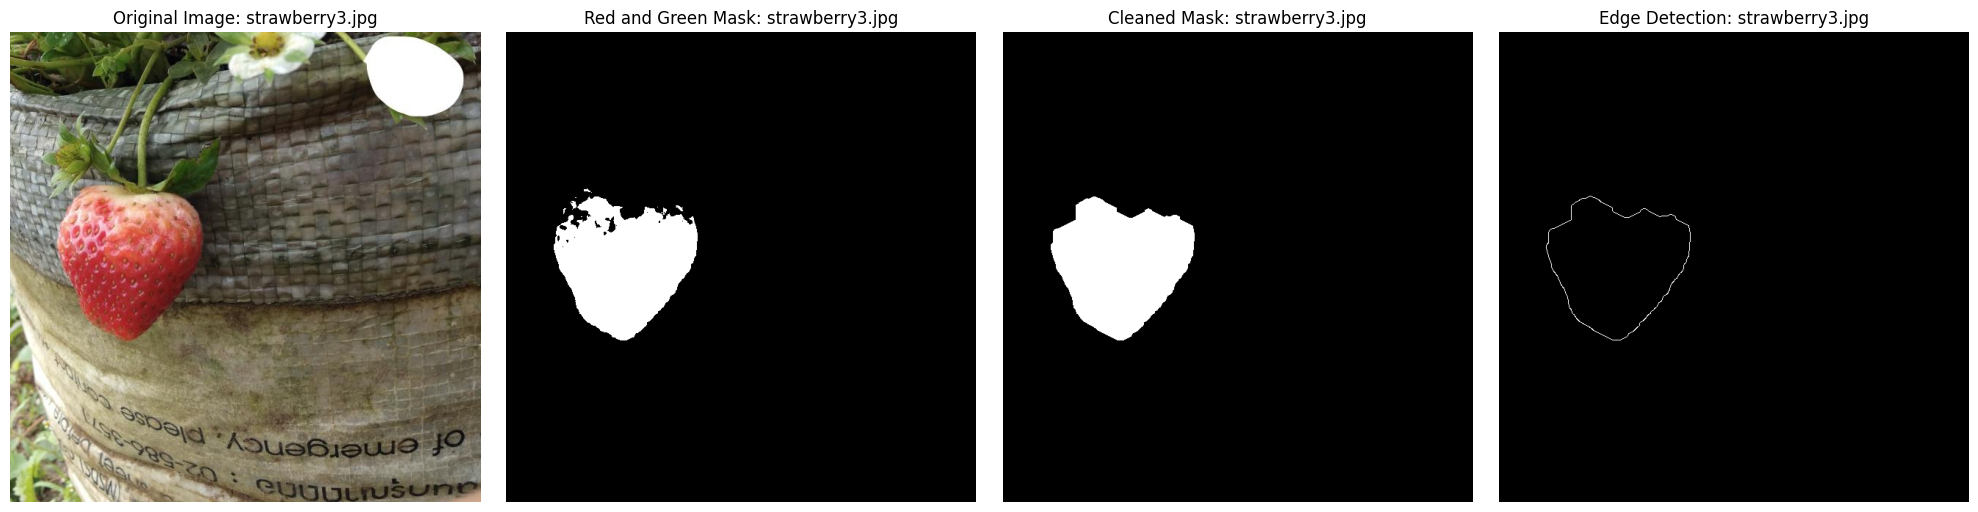

In [245]:
img_paths = ['strawberry1.png', 'strawberry2.jpg', 'strawberry3.jpg']

for img_path in img_paths:
    img = cv2.imread(img_path)
    
    if img is None:
        print(f"Error: Unable to load image {img_path}")
        continue
    
    img_resized = cv2.resize(img, (640, 640))  
    
    mask = mask_red_and_green(img_resized)
    
    cleaned_mask = apply_morphological_operations(mask)
    
    edges_mask = detect_edges_from_mask(cleaned_mask)
    
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    
    # Gambar asli
    ax[0].imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
    ax[0].set_title(f"Original Image: {img_path}")
    ax[0].axis('off')

    # Masker merah dan hijau
    ax[1].imshow(mask, cmap='gray')
    ax[1].set_title(f"Red and Green Mask: {img_path}")
    ax[1].axis('off')

    # Masker yang sudah dibersihkan dengan morfologi
    ax[2].imshow(cleaned_mask, cmap='gray')
    ax[2].set_title(f"Cleaned Mask: {img_path}")
    ax[2].axis('off')

    # Garis tepi dari masker
    ax[3].imshow(edges_mask, cmap='gray')
    ax[3].set_title(f"Edge Detection: {img_path}")
    ax[3].axis('off')

    plt.tight_layout()
    plt.show()

# CODE FULL #

[ WARN:0@4902.478] global loadsave.cpp:241 findDecoder imread_('strawberry.png'): can't open/read file: check file path/integrity


Error: Unable to load image strawberry.png


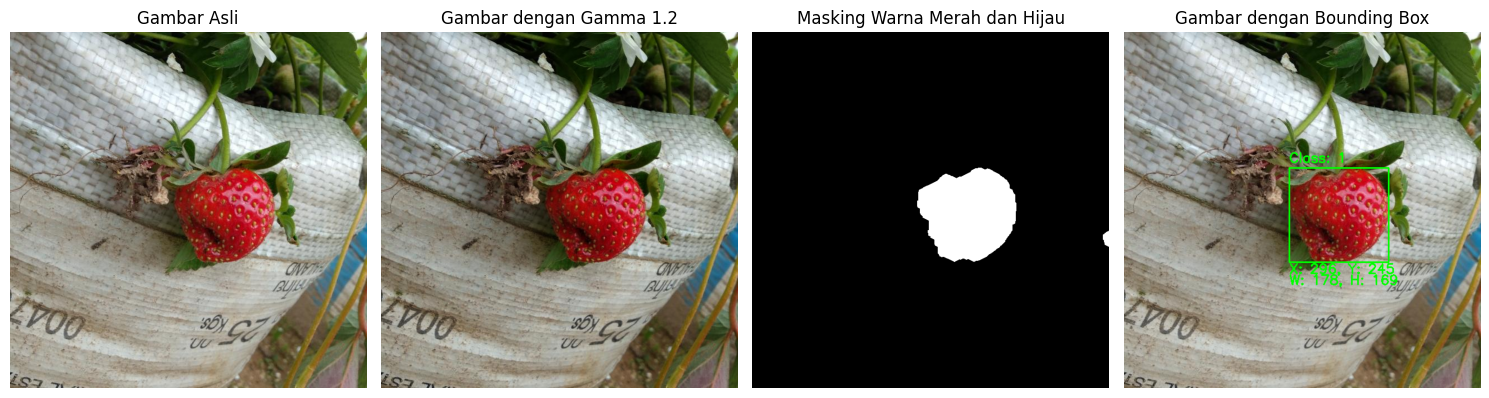

YOLO Format Label: 1 0.601562 0.514844 0.278125 0.264062


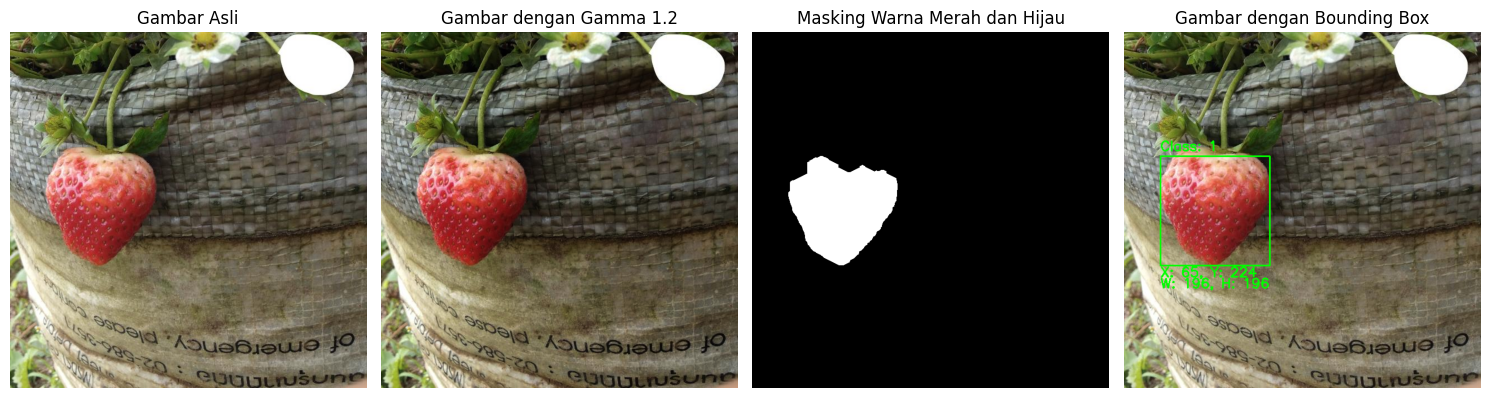

YOLO Format Label: 1 0.254688 0.503125 0.306250 0.306250


In [246]:
img_paths = ['strawberry.jpg', 'strawberry2.jpg', 'strawberry3.jpg']

for img_path in img_paths:
    img = cv2.imread(img_path)
    
    if img is None:
        print(f"Error: Unable to load image {img_path}")
        continue
    
    img_resized = cv2.resize(img, (640, 640))  
    
    mask = mask_red_and_green(img_resized)
    
    cleaned_mask = apply_morphological_operations(mask)
    
    edges_mask = detect_edges_from_mask(cleaned_mask)
    
    img_with_boxes, bounding_box = label_image_with_bounding_box(img_resized, cleaned_mask)
    
    fig, ax = plt.subplots(1, 4, figsize=(15, 5))
    
    # Gambar asli
    ax[0].imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
    ax[0].set_title("Gambar Asli")
    ax[0].axis("off")

    gamma_value = 1.2  
    img_gamma = np.power(img_resized / 255.0, gamma_value) * 255
    img_gamma = np.uint8(np.clip(img_gamma, 0, 255))
    ax[1].imshow(cv2.cvtColor(img_gamma, cv2.COLOR_BGR2RGB))
    ax[1].set_title(f"Gambar dengan Gamma {gamma_value}")
    ax[1].axis("off")

    ax[2].imshow(cleaned_mask, cmap='gray')
    ax[2].set_title("Masking Warna Merah dan Hijau")
    ax[2].axis("off")

    ax[3].imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
    ax[3].set_title("Gambar dengan Bounding Box")
    ax[3].axis("off")

    plt.tight_layout()
    plt.show()

    if bounding_box:
        x_center = (bounding_box[0] + bounding_box[2] / 2) / 640  
        y_center = (bounding_box[1] + bounding_box[3] / 2) / 640 
        width = bounding_box[2] / 640 
        height = bounding_box[3] / 640  

        yolo_format = f"1 {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}"
        print(f"YOLO Format Label: {yolo_format}")
    else:
        print('Tidak ada kontur ditemukan')